In [1]:
from __future__ import division

import gym
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim

import trackpy as tp
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import scipy.misc
import os
%matplotlib inline
from trackpy.predict import NearestVelocityPredict

import cv2

/home/ubuntu/env2.7/local/lib/python2.7/site-packages/trackpy/utils.py:46: UserWarning: Due to a bug in Scipy 0.18.0, the (faster) cKDTree cannot be used. For better linking performance, upgrade or downgrade scipy.
  warnings.warn("Due to a bug in Scipy 0.18.0, the (faster) cKDTree cannot "


In [2]:
import pdb
from time import sleep

import tensorflow.python.platform
from tensorflow.python.platform import gfile

from PIL import Image
import re

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier

import cPickle

In [3]:
from piaget import Point, Mover, MoverTracker, FramePair, Box, Categorizer
from piaget import init_env, play

In [38]:
random_seed = 66

In [39]:
np.random.seed(random_seed)
#env = gym.make('MsPacman-v0'); num_wait_steps=100;
env = gym.make('Breakout-v0'); num_wait_steps = 1;
#env = gym.make('Assault-v0'); num_wait_steps = 1;

[2017-06-06 00:56:07,085] Making new env: Breakout-v0


In [40]:
import matplotlib.colors as mcolors
box_colors_rgb = np.array([mcolors.hex2color(v) for v in mcolors.cnames.values()]).reshape((1,150, 3))
box_colors_hsv = mcolors.rgb_to_hsv(box_colors_rgb)
good_indices = (box_colors_hsv[0][:,1] > 0.5) & (box_colors_hsv[0][:,2] < 0.8)

box_colors = box_colors_rgb[0][good_indices]

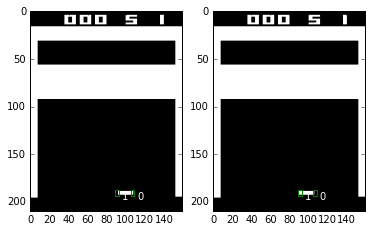

Join (0,), Shift (-1, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, -2) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (-1, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, -931), crop_backwards: (1, 931)

Join (0,), Shift (0, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -931), crop_backwards: (0, 931)

Join (0,), Shift (-1, -930) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -930), crop_backwards: (1, 930)

Join (0,), Shift (0, -

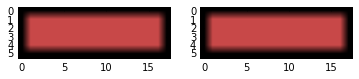

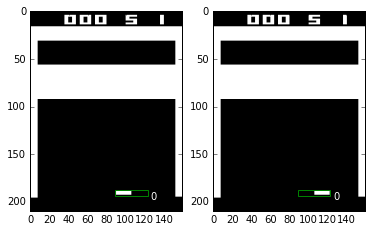

Join (0,), Shift (0, 16) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, 16), crop_backwards: (0, -16)

Join (0,), Shift (1, 16) Score 0.5
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (1, 16), crop_backwards: (-1, -16)

Join (0,), Shift (0, 17) Score 0.25
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 17), crop_backwards: (0, -17)

Join (0,), Shift (1, 17) Score 0.544862367943
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (1, 17), crop_backwards: (-1, -17)

Join (0,), Shift (0, 16) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, 16), crop_backwards: (0, -16)

Join (0,), Shift (1, 16) Score 0.5
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (1, 16), crop_backwards: (-1, -16)

Join (0,), Shift (0, 17) Score 0.25
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 17), crop_backwards: (0, -17)

Join (0,), Shift (1, 17) Score 0.544862367943
score_forwards: 

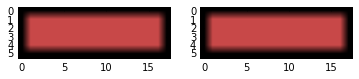

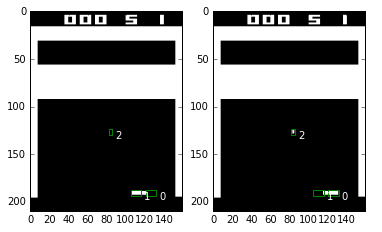

Join (0,), Shift (-1, 8) Score 1.02740233383
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, 8), crop_backwards: (1, -8)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1530.0, score_backwards: 1530.0
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (-1, 9) Score 1.02740233383
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, 9), crop_backwards: (1, -9)

Join (0,), Shift (0, 9) Score 1.0
score_forwards: 1530.0, score_backwards: 1530.0
Crop: (0, 9), crop_backwards: (0, -9)

Join (0,), Shift (-1, 8) Score 1.02740233383
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, 8), crop_backwards: (1, -8)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1530.0, score_backwards: 1530.0
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (-1, 9) Score 1.02740233383
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, 9), crop_backwards: (1, -9)

Join (0,), Shift (0, 9) Score 1.0
score_forwards:

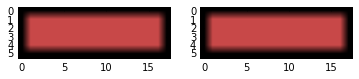

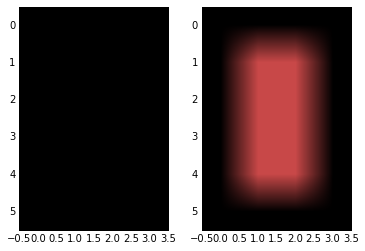

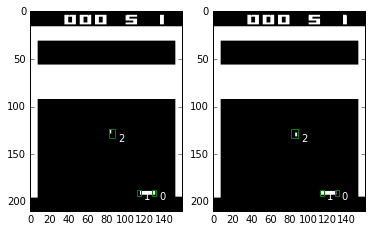

Join (0,), Shift (-1, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, -2) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (-1, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, -931), crop_backwards: (1, 931)

Join (0,), Shift (0, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -931), crop_backwards: (0, 931)

Join (0,), Shift (-1, -930) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -930), crop_backwards: (1, 930)

Join (0,), Shift (0, -

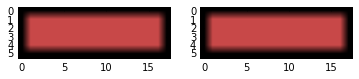

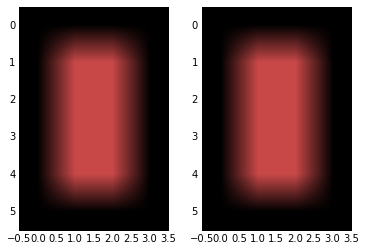

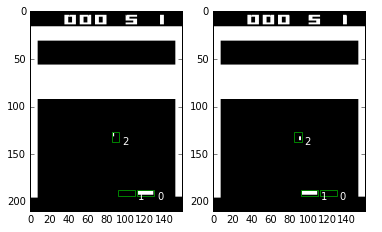

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (0,), Shift (-3, 9) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (-3, 9), crop_backwards: (3, -9)

Join (1,), Shift

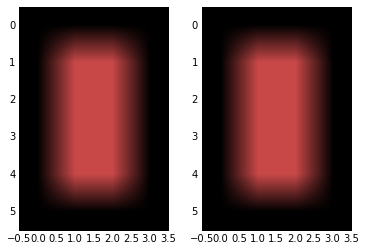

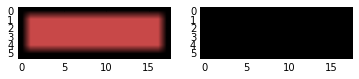

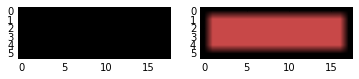

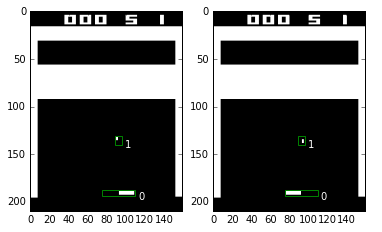

Join (0,), Shift (-1, -17) Score 0.5
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (-1, -17), crop_backwards: (1, 17)

Join (0,), Shift (0, -17) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -17), crop_backwards: (0, 17)

Join (0,), Shift (-1, -16) Score 0.544862367943
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, -16), crop_backwards: (1, 16)

Join (0,), Shift (0, -16) Score 0.25
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -16), crop_backwards: (0, 16)

Join (0,), Shift (-1, -17) Score 0.5
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (-1, -17), crop_backwards: (1, 17)

Join (0,), Shift (0, -17) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -17), crop_backwards: (0, 17)

Join (0,), Shift (-1, -16) Score 0.544862367943
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, -16), crop_backwards: (1, 16)

Join (0,), Shift (0, -16) Score 0.25
s

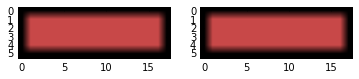

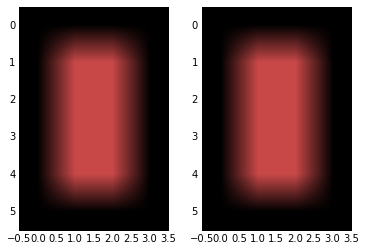

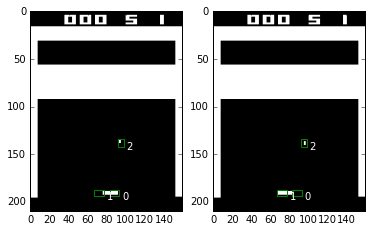

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (

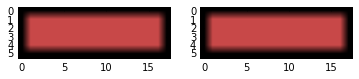

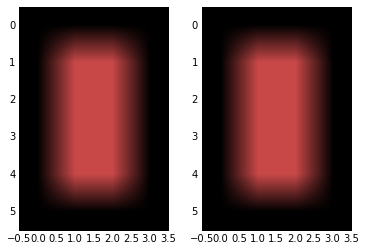

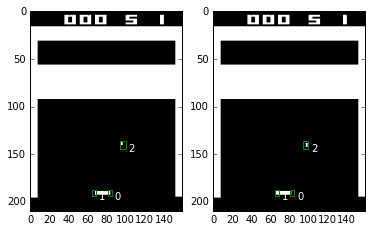

Join (0,), Shift (-1, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, -2) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (-1, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, -931), crop_backwards: (1, 931)

Join (0,), Shift (0, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -931), crop_backwards: (0, 931)

Join (0,), Shift (-1, -930) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -930), crop_backwards: (1, 930)

Join (0,), Shift (0, -

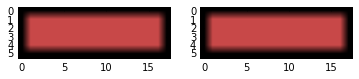

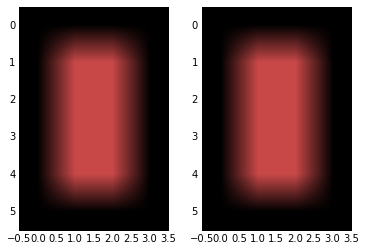

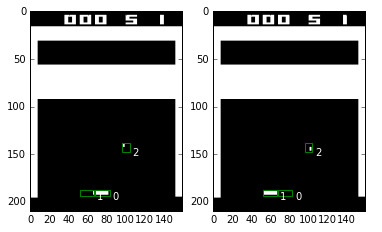

Join (0,), Shift (-2, -8) Score 1.03774904333
score_forwards: 1908.24526725, score_backwards: 1908.24526725
Crop: (-2, -8), crop_backwards: (2, 8)

Join (0,), Shift (-1, -8) Score 1.01904933073
score_forwards: 1873.85965323, score_backwards: 1873.85965323
Crop: (-1, -8), crop_backwards: (1, 8)

Join (0,), Shift (-2, -7) Score 1.03774904333
score_forwards: 1908.24526725, score_backwards: 1908.24526725
Crop: (-2, -7), crop_backwards: (2, 7)

Join (0,), Shift (-1, -7) Score 1.01904933073
score_forwards: 1873.85965323, score_backwards: 1873.85965323
Crop: (-1, -7), crop_backwards: (1, 7)

Join (0,), Shift (-2, -8) Score 1.03774904333
score_forwards: 1908.24526725, score_backwards: 1908.24526725
Crop: (-2, -8), crop_backwards: (2, 8)

Join (0,), Shift (-1, -8) Score 1.01904933073
score_forwards: 1873.85965323, score_backwards: 1873.85965323
Crop: (-1, -8), crop_backwards: (1, 8)

Join (0,), Shift (-2, -7) Score 1.03774904333
score_forwards: 1908.24526725, score_backwards: 1908.24526725
Crop

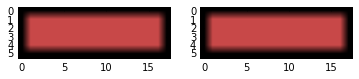

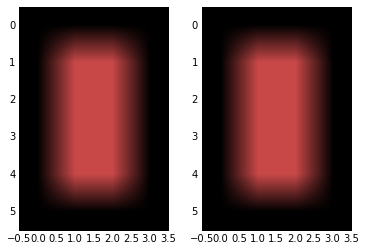

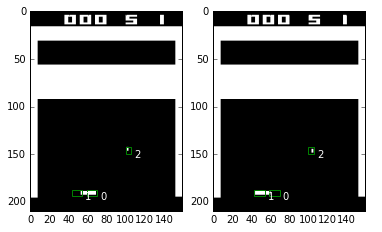

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 1530.0, score_backwards: 1530.0
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (1, 0) Score 1.02740233383
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (1, 0), crop_backwards: (-1, 0)

Join (0,), Shift (0, 1) Score 1.10554159679
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (1, 1) Score 1.10554159679
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (1, 1), crop_backwards: (-1, -1)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 1530.0, score_backwards: 1530.0
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (1, 0) Score 1.02740233383
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (1, 0), crop_backwards: (-1, 0)

Join (0,), Shift (0, 1) Score 1.10554159679
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (1, 1) Score 1.10

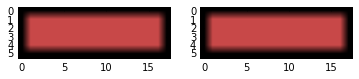

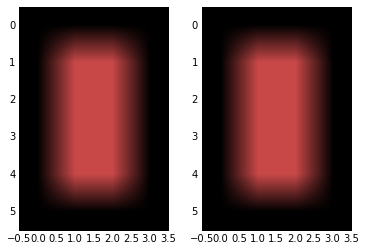

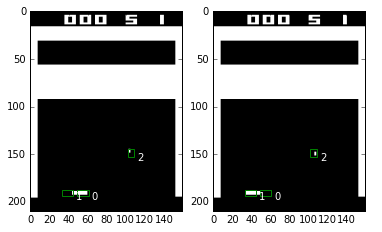

Join (0,), Shift (0, 1) Score 1.09544511501
score_forwards: 1766.69182372, score_backwards: 1766.69182372
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (1, 1) Score 1.09544511501
score_forwards: 1766.69182372, score_backwards: 1766.69182372
Crop: (1, 1), crop_backwards: (-1, -1)

Join (0,), Shift (0, -10) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, -10), crop_backwards: (0, 10)

Join (0,), Shift (1, -10) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, -10), crop_backwards: (-1, 10)

Join (0,), Shift (0, 1) Score 1.09544511501
score_forwards: 1766.69182372, score_backwards: 1766.69182372
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (1, 1) Score 1.09544511501
score_forwards: 1766.69182372, score_backwards: 1766.69182372
Crop: (1, 1), crop_backwards: (-1, -1)

Join (0,), Shift (0, -10) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, -10), crop_backwards: 

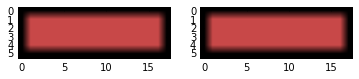

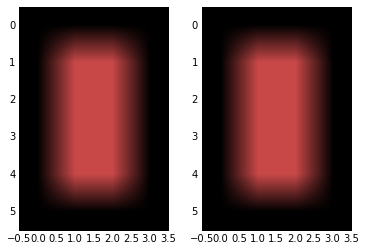

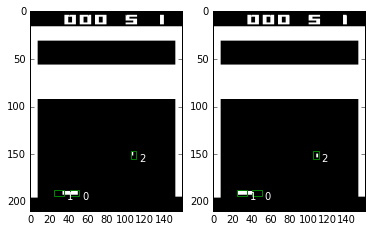

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (

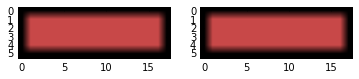

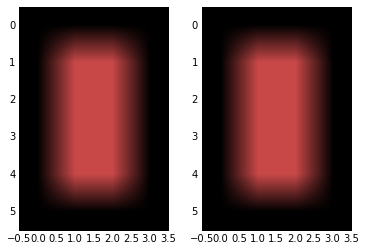

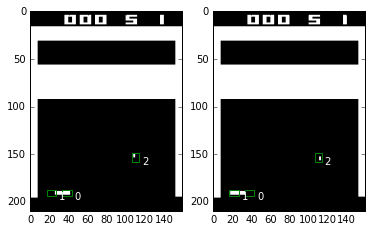

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.0307764064
score_forwards: 1486.89273319, score_backwards: 1486.89273319
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (

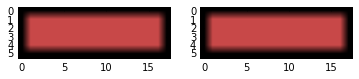

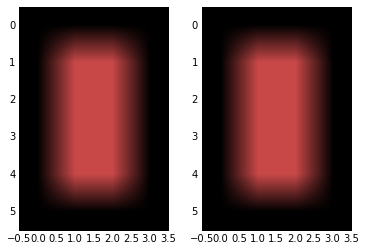

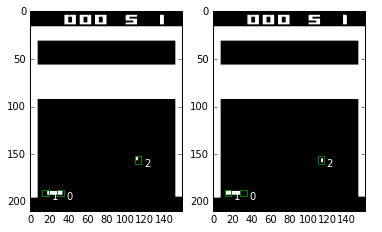

Join (0,), Shift (-1, 0) Score 1.04880884817
score_forwards: 1196.05601875, score_backwards: 1196.05601875
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 1140.39466852, score_backwards: 1140.39466852
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (-1, 1) Score 1.18321595662
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.18321595662
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, 0) Score 1.04880884817
score_forwards: 1196.05601875, score_backwards: 1196.05601875
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 1140.39466852, score_backwards: 1140.39466852
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (-1, 1) Score 1.18321595662
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (-1, 1), crop_backwards: (1, -1)

J

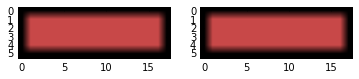

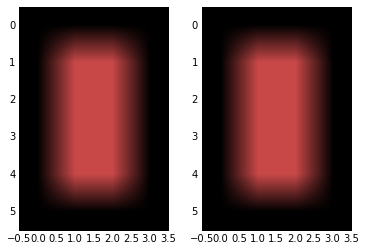

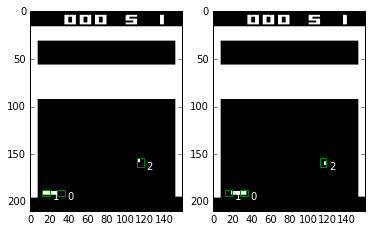

Join (0,), Shift (0, 2) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, 2), crop_backwards: (0, -2)

Join (0,), Shift (1, 2) Score 1.04083299973
score_forwards: 1300.24997597, score_backwards: 1300.24997597
Crop: (1, 2), crop_backwards: (-1, -2)

Join (0,), Shift (0, 3) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, 3), crop_backwards: (0, -3)

Join (0,), Shift (1, 3) Score 1.04083299973
score_forwards: 1300.24997597, score_backwards: 1300.24997597
Crop: (1, 3), crop_backwards: (-1, -3)

Join (0,), Shift (0, 2) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, 2), crop_backwards: (0, -2)

Join (0,), Shift (1, 2) Score 1.04083299973
score_forwards: 1300.24997597, score_backwards: 1300.24997597
Crop: (1, 2), crop_backwards: (-1, -2)

Join (0,), Shift (0, 3) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, 3), crop_backwards: (0, -3)

Join (0,), Shift (1, 3

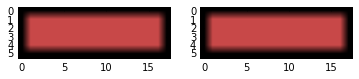

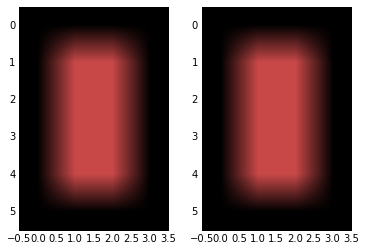

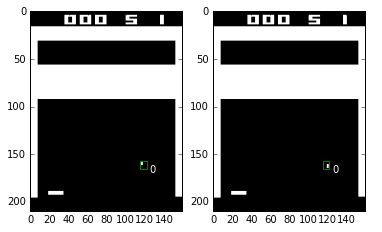

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 4), crop_backwards: (-3, -4)

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backward

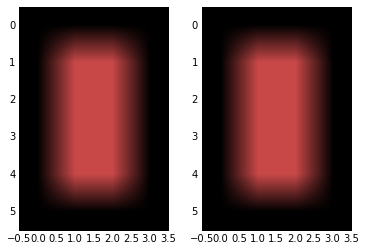

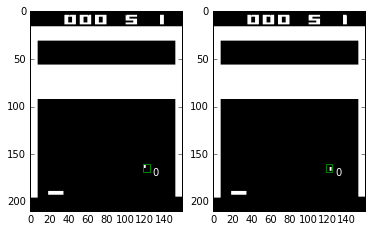

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 4), crop_backwards: (-3, -4)

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backward

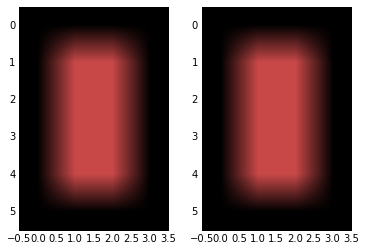

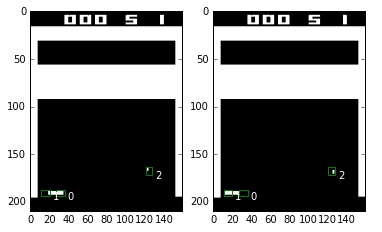

Join (0,), Shift (0, -7) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -7), crop_backwards: (0, 7)

Join (0,), Shift (1, -7) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -7), crop_backwards: (-1, 7)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -7) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -7), crop_backwards: (0, 7)

Join (0,), Shift (1, -7) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -7), crop_backwards: (-1, 7)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shif

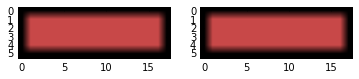

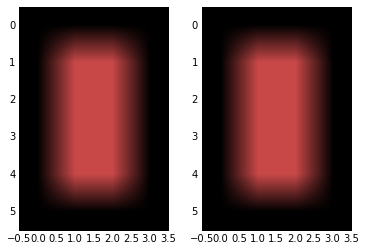

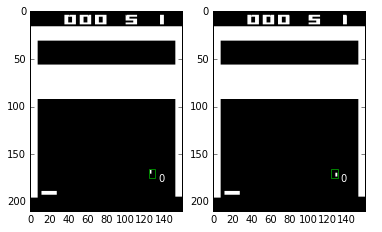

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 4), crop_backwards: (-3, -4)

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backward

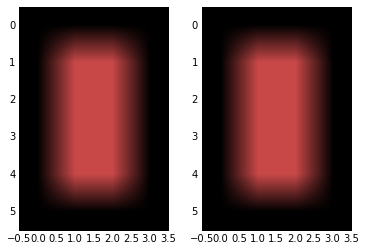

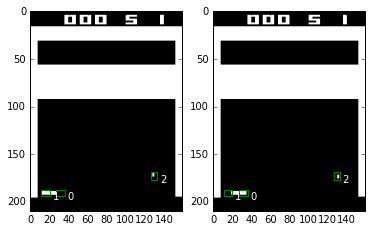

Join (0,), Shift (-1, 2) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (-1, 2), crop_backwards: (1, -2)

Join (0,), Shift (0, 2) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, 2), crop_backwards: (0, -2)

Join (0,), Shift (-1, 3) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (-1, 3), crop_backwards: (1, -3)

Join (0,), Shift (0, 3) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, 3), crop_backwards: (0, -3)

Join (0,), Shift (-1, 2) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (-1, 2), crop_backwards: (1, -2)

Join (0,), Shift (0, 2) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, 2), crop_backwards: (0, -2)

Join (0,), Shift (-1, 3) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (-1, 3), crop_backwards: (1, -3)

Join (0

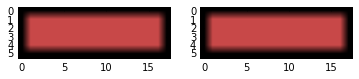

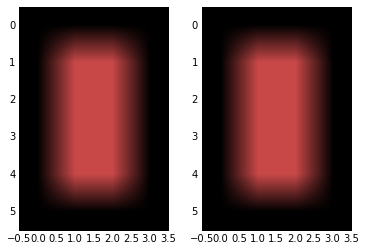

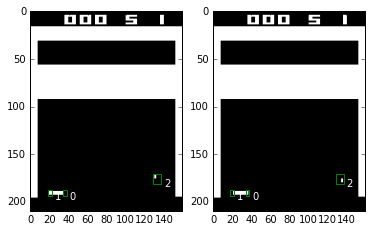

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (1, 0) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (1, 0), crop_backwards: (-1, 0)

Join (0,), Shift (0, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (1, 1) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (1, 1), crop_backwards: (-1, -1)

Join (0,), Shift (0, 640) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 640), crop_backwards: (0, -640)

Join (0,), Shift (1, 640) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (1, 640), crop_backwards: (-1, -640)

Join (0,), Shift (0, 641) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 641), crop_backwards: (0, -641)

Join (0,), Shi

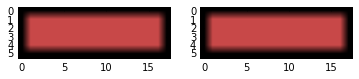

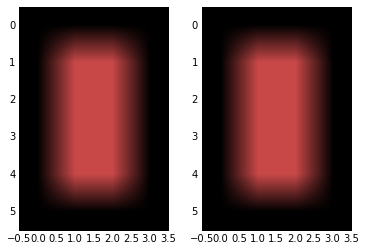

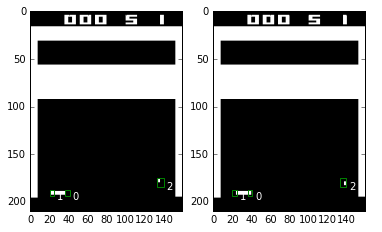

Join (0,), Shift (-1, 0) Score 1.08012344973
score_forwards: 954.122633627, score_backwards: 954.122633627
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (-1, 1) Score 1.08012344973
score_forwards: 954.122633627, score_backwards: 954.122633627
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.0
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, -5) Score 1.08012344973
score_forwards: 954.122633627, score_backwards: 954.122633627
Crop: (-1, -5), crop_backwards: (1, 5)

Join (0,), Shift (0, -5) Score 1.0
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (0, -5), crop_backwards: (0, 5)

Join (0,), Shift (-1, 1) Score 1.08012344973
score_forwards: 954.122633627, score_backwards: 954.122633627
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Sh

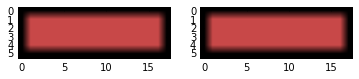

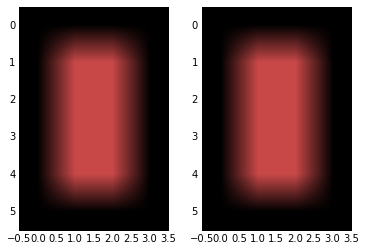

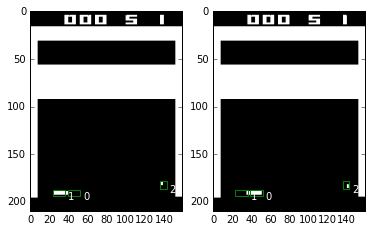

Join (0,), Shift (0, 9) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 9), crop_backwards: (0, -9)

Join (0,), Shift (1, 9) Score 1.02247471629
score_forwards: 1729.4941457, score_backwards: 1729.4941457
Crop: (1, 9), crop_backwards: (-1, -9)

Join (0,), Shift (0, 10) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 10), crop_backwards: (0, -10)

Join (0,), Shift (1, 10) Score 1.02247471629
score_forwards: 1729.4941457, score_backwards: 1729.4941457
Crop: (1, 10), crop_backwards: (-1, -10)

Join (0,), Shift (0, 9) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 9), crop_backwards: (0, -9)

Join (0,), Shift (1, 9) Score 1.02247471629
score_forwards: 1729.4941457, score_backwards: 1729.4941457
Crop: (1, 9), crop_backwards: (-1, -9)

Join (0,), Shift (0, 10) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 10), crop_backwards: (0, -10)

Join (0,), Shift (1

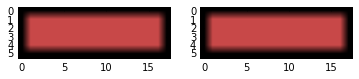

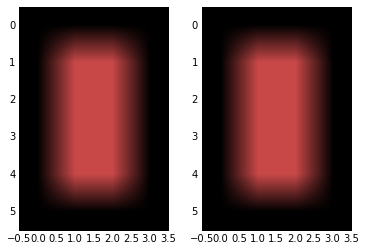

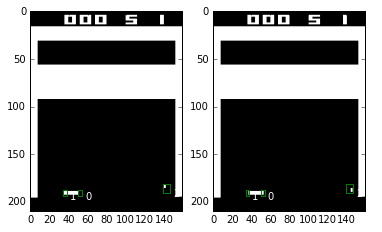

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (1, 0) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (1, 0), crop_backwards: (-1, 0)

Join (0,), Shift (0, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (1, 1) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (1, 1), crop_backwards: (-1, -1)

Join (0,), Shift (0, 640) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 640), crop_backwards: (0, -640)

Join (0,), Shift (1, 640) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (1, 640), crop_backwards: (-1, -640)

Join (0,), Shift (0, 641) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, 641), crop_backwards: (0, -641)

Join (0,), Shi

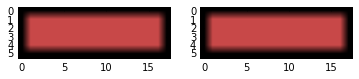

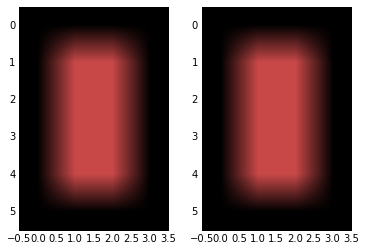

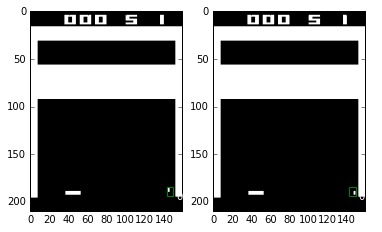

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 4), crop_backwards: (-3, -4)

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backward

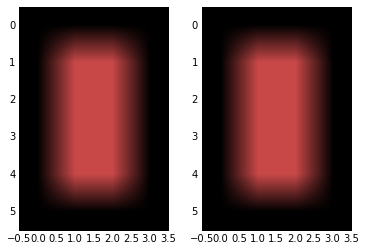

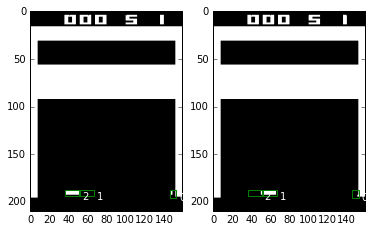

Join (0,), Shift (-1, 0) Score 1.09544511501
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (-1, 1) Score 1.54919333848
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.54919333848
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, 0) Score 1.09544511501
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (-1, 1) Score 1.54919333848
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (-1, 1), crop_backwards: (1, -1)

Join 

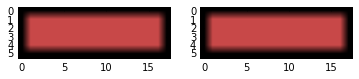

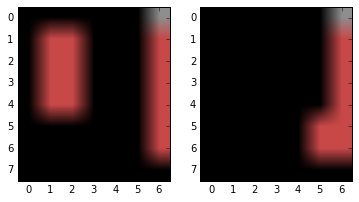

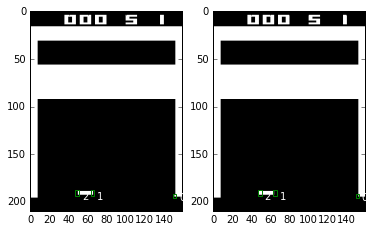

Join (0,), Shift (3, -1) Score 2.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, -1), crop_backwards: (-3, 1)

Join (0,), Shift (0, -1) Score 2.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -1), crop_backwards: (0, 1)

Join (0,), Shift (-1, 0) Score 1.41421356237
score_forwards: 510.0, score_backwards: 510.0
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 360.624458405, score_backwards: 360.624458405
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (1126087, -717871) Score 2.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (1126087, -717871), crop_backwards: (-1126087, 717871)

Join (0,), Shift (1126088, -717871) Score 2.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (1126088, -717871), crop_backwards: (-1126088, 717871)

Join (0,), Shift (1126087, -717870) Score 1.41421356237
score_forwards: 510.0, score_backwards: 510.0
Crop: (1126087, -717870), cro

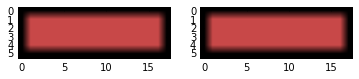

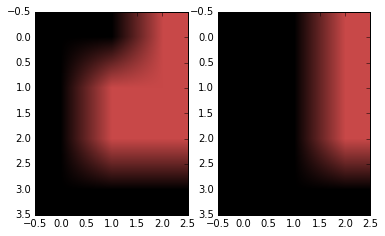

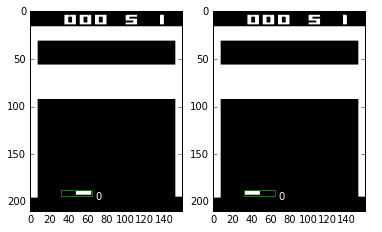

Join (0,), Shift (-1, -16) Score 0.562731433871
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, -16), crop_backwards: (1, 16)

Join (0,), Shift (0, -16) Score 0.258198889747
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -16), crop_backwards: (0, 16)

Join (0,), Shift (-1, -15) Score 0.516397779494
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (-1, -15), crop_backwards: (1, 15)

Join (0,), Shift (0, -15) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -15), crop_backwards: (0, 15)

Join (0,), Shift (-1, -16) Score 0.562731433871
score_forwards: 1571.92557076, score_backwards: 1571.92557076
Crop: (-1, -16), crop_backwards: (1, 16)

Join (0,), Shift (0, -16) Score 0.258198889747
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -16), crop_backwards: (0, 16)

Join (0,), Shift (-1, -15) Score 0.516397779494
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (-1, -15), cr

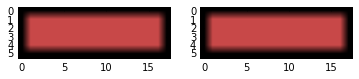

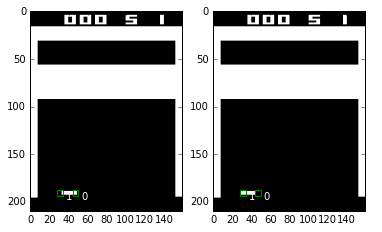

Join (0,), Shift (-1, -3) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -3), crop_backwards: (1, 3)

Join (0,), Shift (0, -3) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (-1, -2) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (-1, -3) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -3), crop_backwards: (1, 3)

Join (0,), Shift (0, -3) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (-1, -2) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_f

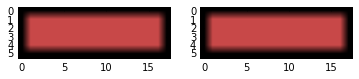

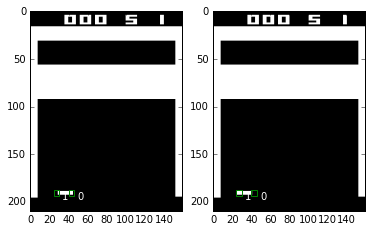

Join (0,), Shift (-1, -3) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -3), crop_backwards: (1, 3)

Join (0,), Shift (0, -3) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (-1, -2) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (-1, -3) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -3), crop_backwards: (1, 3)

Join (0,), Shift (0, -3) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (-1, -2) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_f

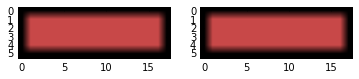

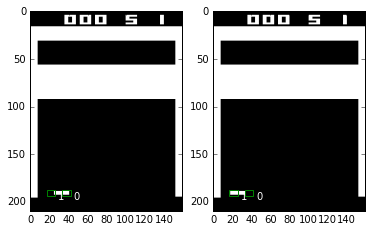

Join (0,), Shift (0, -7) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -7), crop_backwards: (0, 7)

Join (0,), Shift (1, -7) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -7), crop_backwards: (-1, 7)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -7) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -7), crop_backwards: (0, 7)

Join (0,), Shift (1, -7) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -7), crop_backwards: (-1, 7)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shif

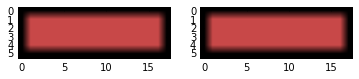

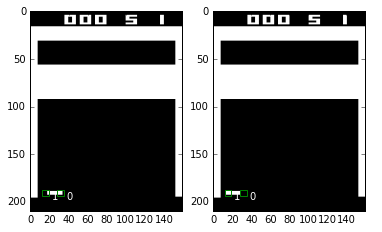

Join (0,), Shift (-1, 0) Score 1.04880884817
score_forwards: 1196.05601875, score_backwards: 1196.05601875
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 1140.39466852, score_backwards: 1140.39466852
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (-1, 1) Score 1.18321595662
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.18321595662
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, 0) Score 1.04880884817
score_forwards: 1196.05601875, score_backwards: 1196.05601875
Crop: (-1, 0), crop_backwards: (1, 0)

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 1140.39466852, score_backwards: 1140.39466852
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (-1, 1) Score 1.18321595662
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (-1, 1), crop_backwards: (1, -1)

J

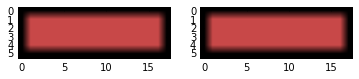

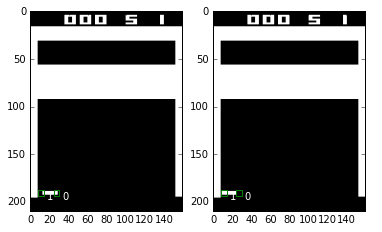

Join (0,), Shift (-1, -3) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -3), crop_backwards: (1, 3)

Join (0,), Shift (0, -3) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (-1, -2) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (-1, -3) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -3), crop_backwards: (1, 3)

Join (0,), Shift (0, -3) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (-1, -2) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_f

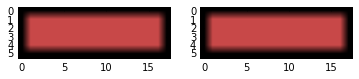

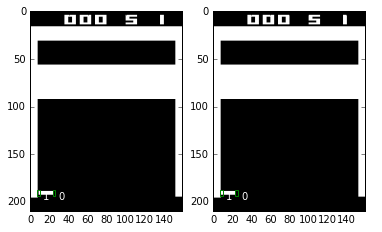

Join (0,), Shift (0, 0) Score 1.0
score_forwards: 510.0, score_backwards: 510.0
Crop: (0, 0), crop_backwards: (0, 0)

Join (0,), Shift (1, 0) Score 1.22474487139
score_forwards: 624.61988441, score_backwards: 624.61988441
Crop: (1, 0), crop_backwards: (-1, 0)

Join (0,), Shift (0, 1) Score 1.73205080757
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (1, -2) Score 1.73205080757
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (1, -2), crop_backwards: (-1, 2)

Join (0,), Shift (0, 3) Score 1.0
score_forwards: 510.0, score_backwards: 510.0
Crop: (0, 3), crop_backwards: (0, -3)

Join (0,), Shift (1, 3) Score 1.22474487139
score_forwards: 624.61988441, score_backwards: 624.61988441
Crop: (1, 3), crop_backwards: (-1, -3)

Join (0,), Shift (0, 4) Score 1.73205080757
score_forwards: 883.34591186, score_backwards: 883.34591186
Crop: (0, 4), crop_backwards: (0, -4)

Join (0,), Shift (1, 4) Score 1.73205080757
s

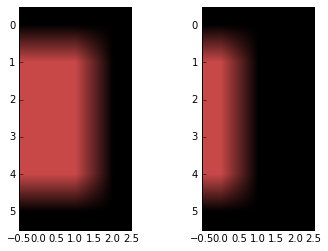

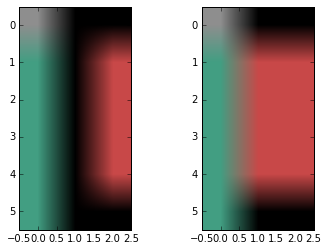

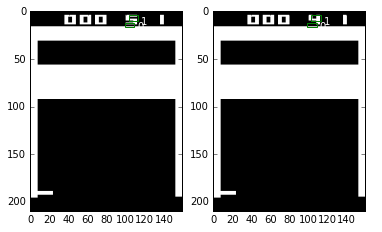

Join (0,), Shift (0, 6) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (0, 6), crop_backwards: (0, -6)

Join (0,), Shift (1, 6) Score 1.11803398875
score_forwards: 1140.39466852, score_backwards: 1140.39466852
Crop: (1, 6), crop_backwards: (-1, -6)

Join (0,), Shift (0, 7) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (0, 7), crop_backwards: (0, -7)

Join (0,), Shift (1, 7) Score 1.11803398875
score_forwards: 1140.39466852, score_backwards: 1140.39466852
Crop: (1, 7), crop_backwards: (-1, -7)

Join (0,), Shift (0, 6) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (0, 6), crop_backwards: (0, -6)

Join (0,), Shift (1, 6) Score 1.11803398875
score_forwards: 1140.39466852, score_backwards: 1140.39466852
Crop: (1, 6), crop_backwards: (-1, -6)

Join (0,), Shift (0, 7) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (0, 7), crop_ba

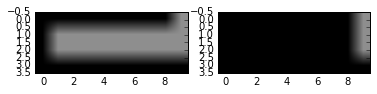

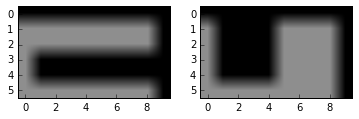

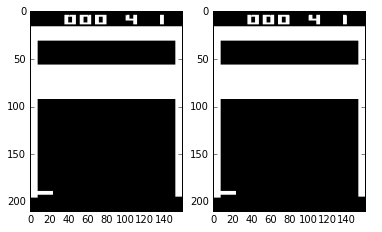


Starting . . . 




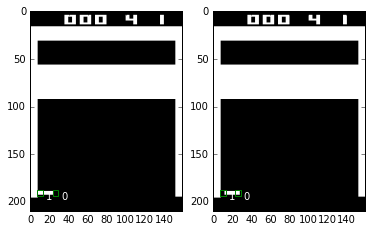

Join (0,), Shift (-1, 3) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, 3), crop_backwards: (1, -3)

Join (0,), Shift (0, 3) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, 3), crop_backwards: (0, -3)

Join (0,), Shift (-1, 4) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, 4), crop_backwards: (1, -4)

Join (0,), Shift (0, 4) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, 4), crop_backwards: (0, -4)

Join (0,), Shift (-1, 1617) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, 1617), crop_backwards: (1, -1617)

Join (0,), Shift (0, 1617) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, 1617), crop_backwards: (0, -1617)

Join (0,), Shift (-1, 1618) Score 1.06066017178
score_forwards: 1081.87337522, score_backwards: 1081.87337522
Crop: (-1, 1618), crop_backwards: (1, -1618)

Join (0,), Shift (0, 1

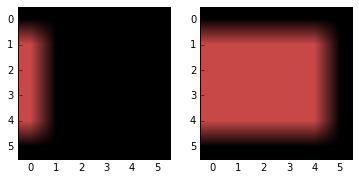

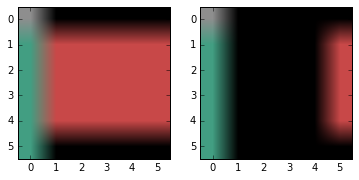

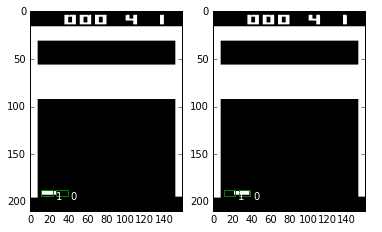

Join (0,), Shift (0, 7) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 7), crop_backwards: (0, -7)

Join (0,), Shift (1, 7) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 7), crop_backwards: (-1, -7)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (1, 8) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 8), crop_backwards: (-1, -8)

Join (0,), Shift (0, 7) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 7), crop_backwards: (0, -7)

Join (0,), Shift (1, 7) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 7), crop_backwards: (-1, -7)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (1, 8) S

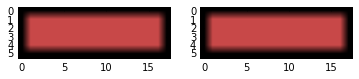

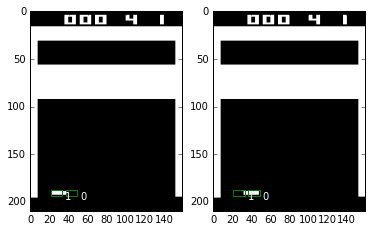

Join (0,), Shift (0, 7) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 7), crop_backwards: (0, -7)

Join (0,), Shift (1, 7) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 7), crop_backwards: (-1, -7)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (1, 8) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 8), crop_backwards: (-1, -8)

Join (0,), Shift (0, 7) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 7), crop_backwards: (0, -7)

Join (0,), Shift (1, 7) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 7), crop_backwards: (-1, -7)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (1, 8) S

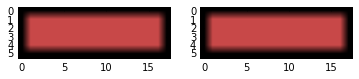

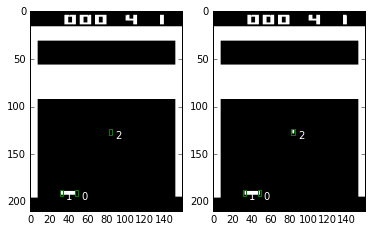

Join (0,), Shift (2, 0) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 0), crop_backwards: (-2, 0)

Join (0,), Shift (3, 0) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 0), crop_backwards: (-3, 0)

Join (0,), Shift (2, 1) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 1), crop_backwards: (-2, -1)

Join (0,), Shift (3, 1) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 1), crop_backwards: (-3, -1)

Join (0,), Shift (8, -6) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (8, -6), crop_backwards: (-8, 6)

Join (0,), Shift (9, -6) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (9, -6), crop_backwards: (-9, 6)

Join (0,), Shift (8, -5) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (8, -5), crop_backwards: 

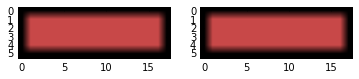

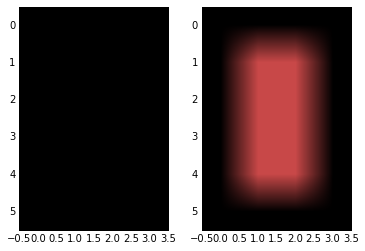

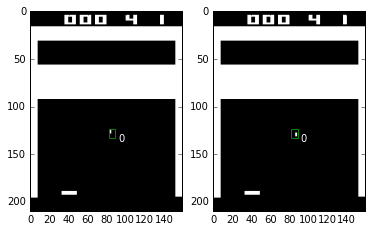

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 4), crop_backwards: (-3, -4)

Join (0,), Shift (2, 3) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 4) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (2, 4), crop_backwards: (-2, -4)

Join (0,), Shift (3, 4) Score 0.707106781187
score_forwards: 721.24891681, score_backward

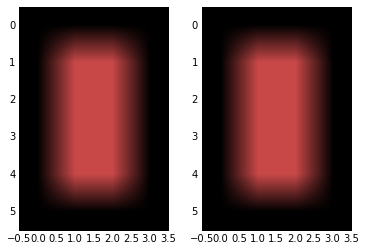

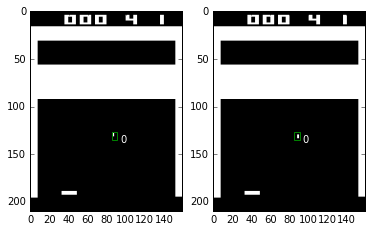

Join (0,), Shift (2, 2) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (2, 2), crop_backwards: (-2, -2)

Join (0,), Shift (3, 2) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (3, 2), crop_backwards: (-3, -2)

Join (0,), Shift (2, 3) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 2) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (2, 2), crop_backwards: (-2, -2)

Join (0,), Shift (3, 2) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (3, 2), crop_backwards: (-3, -2)

Join (0,), Shift (2, 3) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.790569415042
score_forwards: 806.380803343, score_backwards

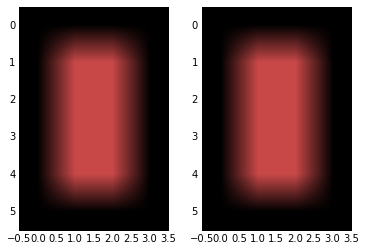

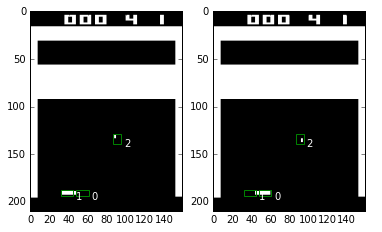

Join (0,), Shift (0, 9) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 9), crop_backwards: (0, -9)

Join (0,), Shift (1, 9) Score 1.02247471629
score_forwards: 1729.4941457, score_backwards: 1729.4941457
Crop: (1, 9), crop_backwards: (-1, -9)

Join (0,), Shift (0, 10) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 10), crop_backwards: (0, -10)

Join (0,), Shift (1, 10) Score 1.02247471629
score_forwards: 1729.4941457, score_backwards: 1729.4941457
Crop: (1, 10), crop_backwards: (-1, -10)

Join (0,), Shift (0, 9) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 9), crop_backwards: (0, -9)

Join (0,), Shift (1, 9) Score 1.02247471629
score_forwards: 1729.4941457, score_backwards: 1729.4941457
Crop: (1, 9), crop_backwards: (-1, -9)

Join (0,), Shift (0, 10) Score 1.0
score_forwards: 1691.47864308, score_backwards: 1691.47864308
Crop: (0, 10), crop_backwards: (0, -10)

Join (0,), Shift (1

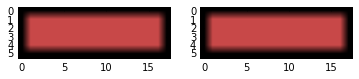

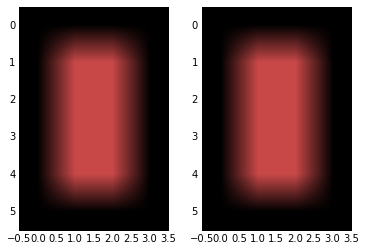

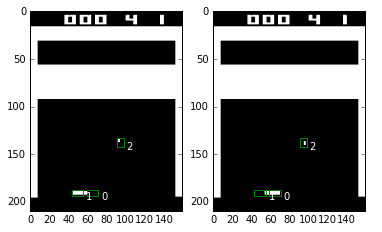

Join (0,), Shift (0, 7) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 7), crop_backwards: (0, -7)

Join (0,), Shift (1, 7) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 7), crop_backwards: (-1, -7)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (1, 8) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 8), crop_backwards: (-1, -8)

Join (0,), Shift (0, 7) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 7), crop_backwards: (0, -7)

Join (0,), Shift (1, 7) Score 1.0246950766
score_forwards: 1652.58887809, score_backwards: 1652.58887809
Crop: (1, 7), crop_backwards: (-1, -7)

Join (0,), Shift (0, 8) Score 1.0
score_forwards: 1612.76160669, score_backwards: 1612.76160669
Crop: (0, 8), crop_backwards: (0, -8)

Join (0,), Shift (1, 8) S

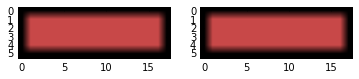

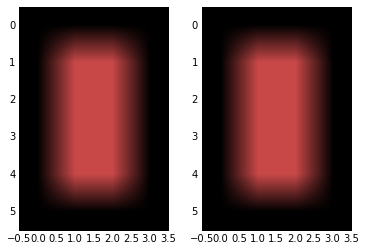

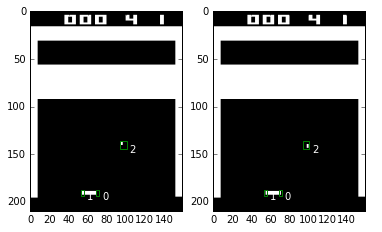

Join (0,), Shift (2, 0) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 0), crop_backwards: (-2, 0)

Join (0,), Shift (3, 0) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 0), crop_backwards: (-3, 0)

Join (0,), Shift (2, 1) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 1), crop_backwards: (-2, -1)

Join (0,), Shift (3, 1) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (3, 1), crop_backwards: (-3, -1)

Join (0,), Shift (8, -6) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (8, -6), crop_backwards: (-8, 6)

Join (0,), Shift (9, -6) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (9, -6), crop_backwards: (-9, 6)

Join (0,), Shift (8, -5) Score 1.41421356237
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (8, -5), crop_backwards: 

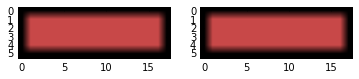

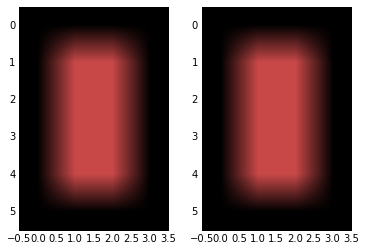

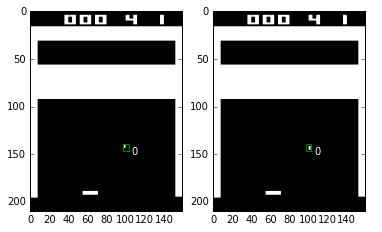

Join (0,), Shift (2, 2) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (2, 2), crop_backwards: (-2, -2)

Join (0,), Shift (3, 2) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (3, 2), crop_backwards: (-3, -2)

Join (0,), Shift (2, 3) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (3, 3), crop_backwards: (-3, -3)

Join (0,), Shift (2, 2) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (2, 2), crop_backwards: (-2, -2)

Join (0,), Shift (3, 2) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (3, 2), crop_backwards: (-3, -2)

Join (0,), Shift (2, 3) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (2, 3), crop_backwards: (-2, -3)

Join (0,), Shift (3, 3) Score 0.790569415042
score_forwards: 806.380803343, score_backwards

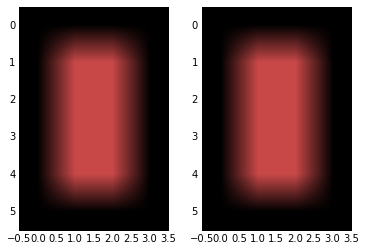

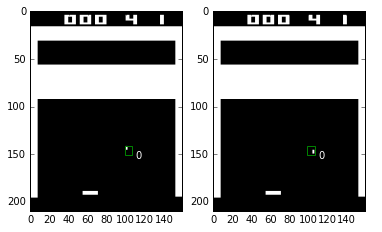

Join (0,), Shift (4, 4) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (4, 4), crop_backwards: (-4, -4)

Join (0,), Shift (5, 4) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (5, 4), crop_backwards: (-5, -4)

Join (0,), Shift (4, 5) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (4, 5), crop_backwards: (-4, -5)

Join (0,), Shift (5, 5) Score 0.790569415042
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (4, 4) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (4, 4), crop_backwards: (-4, -4)

Join (0,), Shift (5, 4) Score 0.5
score_forwards: 510.0, score_backwards: 510.0
Crop: (5, 4), crop_backwards: (-5, -4)

Join (0,), Shift (4, 5) Score 0.707106781187
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (4, 5), crop_backwards: (-4, -5)

Join (0,), Shift (5, 5) Score 0.790569415042
score_forwards: 806.380803343, score_backwards

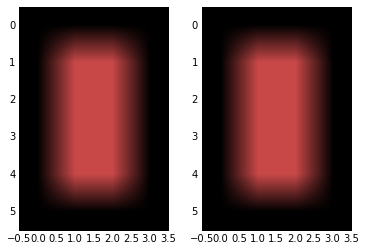

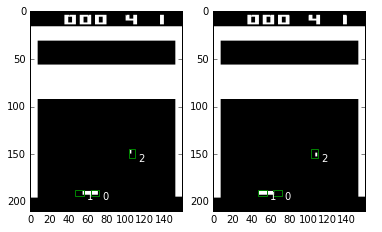

Join (0,), Shift (0, -7) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -7), crop_backwards: (0, 7)

Join (0,), Shift (1, -7) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -7), crop_backwards: (-1, 7)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shift (1, -6) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -6), crop_backwards: (-1, 6)

Join (0,), Shift (0, -7) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -7), crop_backwards: (0, 7)

Join (0,), Shift (1, -7) Score 1.03509833901
score_forwards: 1396.69252164, score_backwards: 1396.69252164
Crop: (1, -7), crop_backwards: (-1, 7)

Join (0,), Shift (0, -6) Score 1.0
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (0, -6), crop_backwards: (0, 6)

Join (0,), Shif

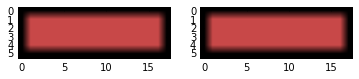

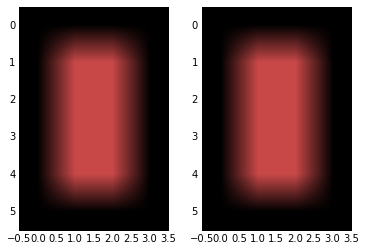

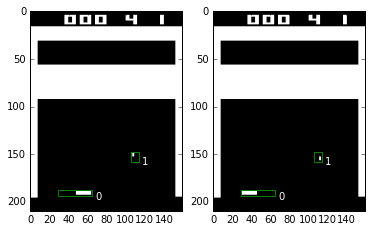

Join (0,), Shift (0, -19) Score 0.25
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -19), crop_backwards: (0, 19)

Join (0,), Shift (0, -19) Score 0.25
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -19), crop_backwards: (0, 19)

Join (0,), Shift (0, -18) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -18), crop_backwards: (0, 18)

Join (0,), Shift (0, -18) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -18), crop_backwards: (0, 18)

Join (0,), Shift (0, -19) Score 0.25
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -19), crop_backwards: (0, 19)

Join (0,), Shift (0, -19) Score 0.25
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -19), crop_backwards: (0, 19)

Join (0,), Shift (0, -18) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -18), crop_backwards: (0, 18)

Join (0,), Shift (0, -18) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -18

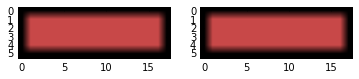

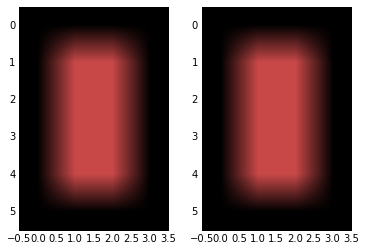

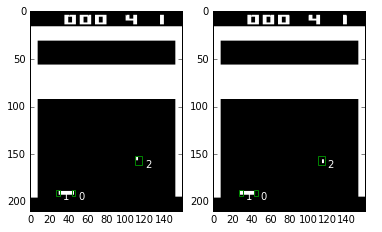

Join (0,), Shift (-1, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, 1), crop_backwards: (1, -1)

Join (0,), Shift (0, 1) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, 1), crop_backwards: (0, -1)

Join (0,), Shift (-1, -2) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -2), crop_backwards: (1, 2)

Join (0,), Shift (0, -2) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (-1, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-1, -931), crop_backwards: (1, 931)

Join (0,), Shift (0, -931) Score 1.41421356237
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (0, -931), crop_backwards: (0, 931)

Join (0,), Shift (-1, -930) Score 1.11803398875
score_forwards: 806.380803343, score_backwards: 806.380803343
Crop: (-1, -930), crop_backwards: (1, 930)

Join (0,), Shift (0, -

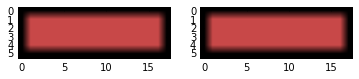

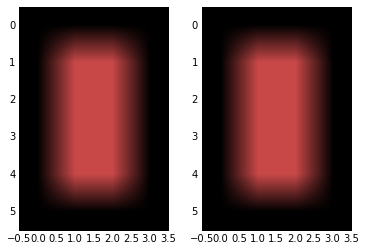

955156


In [43]:
num_steps = 50
img_dir = 'img/'
mt_dir = 'mt/'
mt = play(num_steps, env, img_dir, mt_dir, num_wait_steps, 2183)
fp = mt.frame_pairs
frame_thresh = [f.thresh for f in fp]

print mt.game_id

In [44]:
print mt.game_id

955156


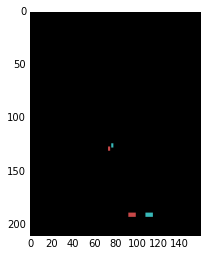

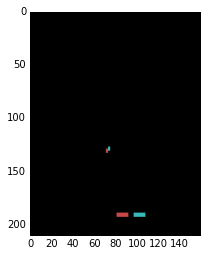

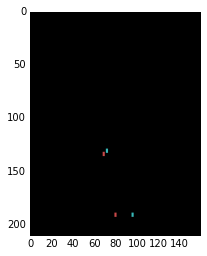

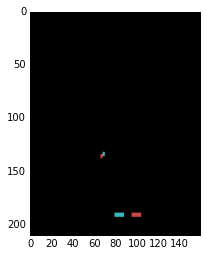

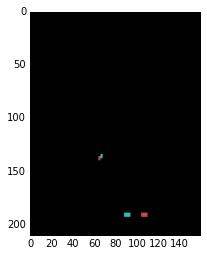

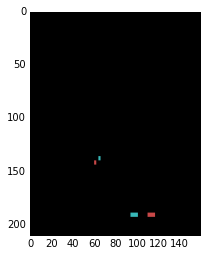

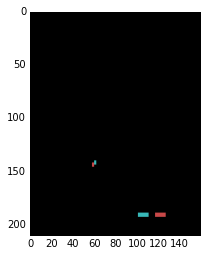

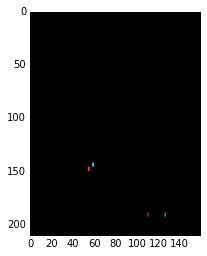

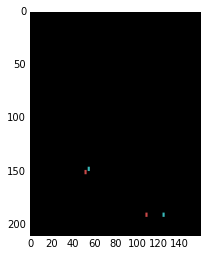

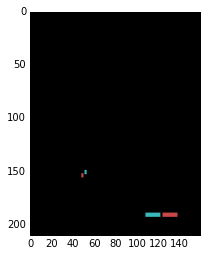

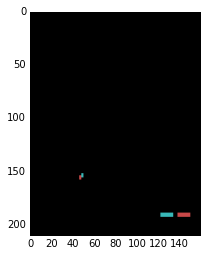

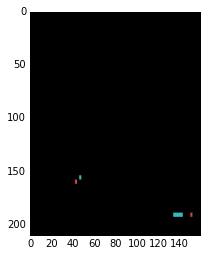

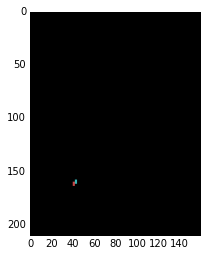

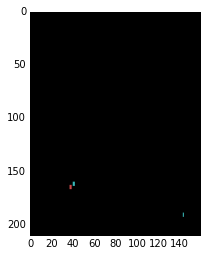

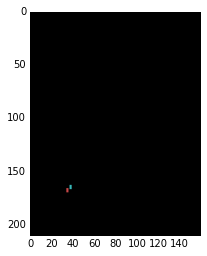

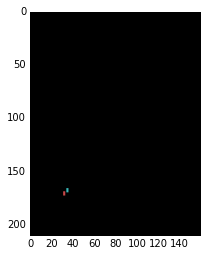

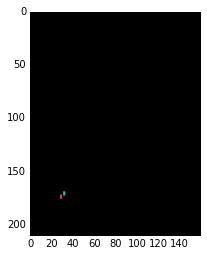

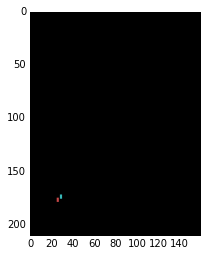

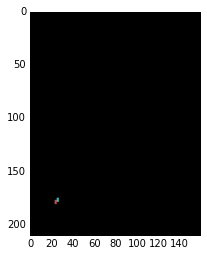

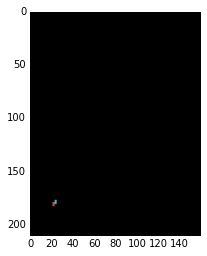

In [32]:
for f in fp:
    plt.imshow(f.s1-f.s0)
    plt.show()

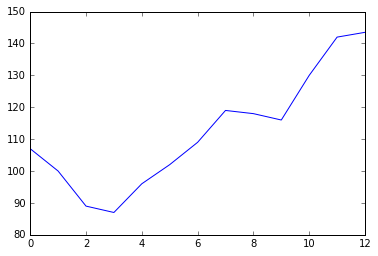

In [28]:
plt.plot([t[1].center.x for t in traj])

In [24]:
traj = mt.movers[0].trajectory
disp_boxes = [(t1[1]-t0[1]) for t1, t0 in zip(traj[1:],traj[:-1])]
disp_pts = [b.ll for b in disp_boxes]
disp_unique = {d.to_tuple() for d in disp_pts}
disp_unique

{(-11, 0),
 (-7, 0),
 (-2, 0),
 (-1, 0),
 (6, 0),
 (7, 0),
 (9, 0),
 (10, 0),
 (12, 0),
 (14, 0)}

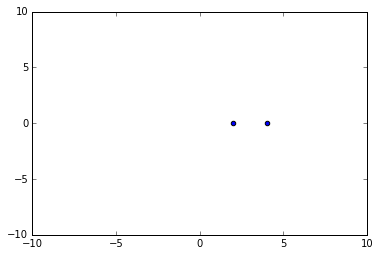

In [20]:
plt.scatter(*zip(*disp_unique))
plt.axis([-10,10,-10,10]);


 Frame: 0


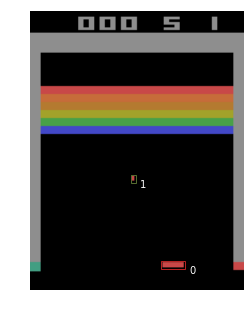


 Frame: 1


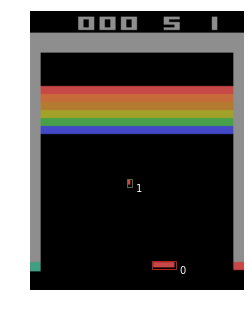


 Frame: 2


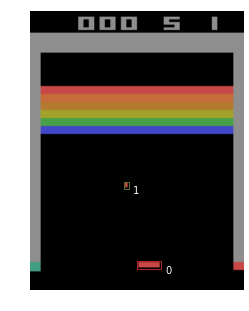


 Frame: 3


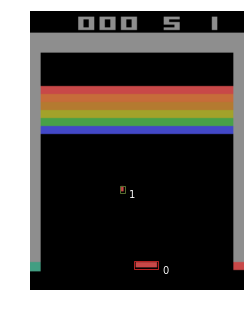


 Frame: 4


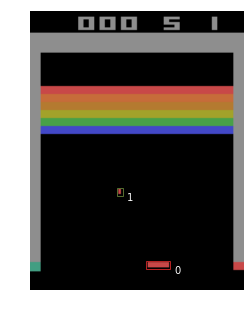


 Frame: 5


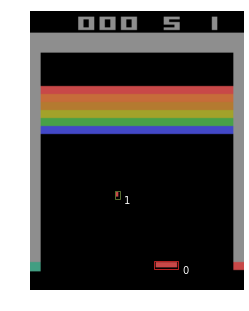


 Frame: 6


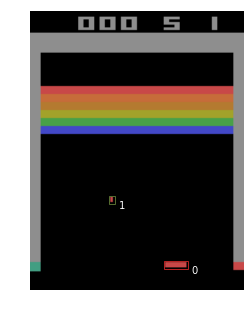


 Frame: 7


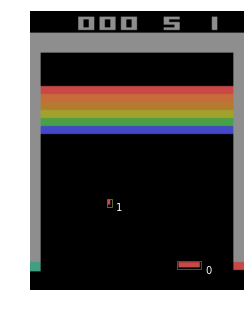


 Frame: 8


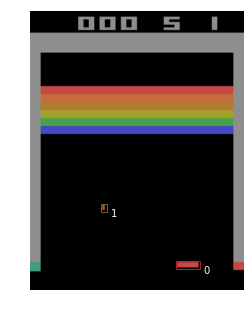


 Frame: 9


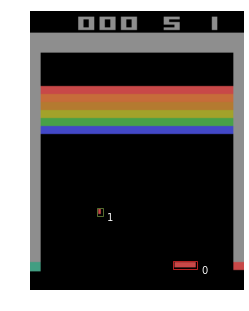


 Frame: 10


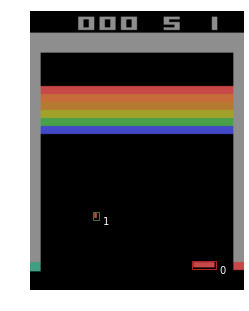


 Frame: 11


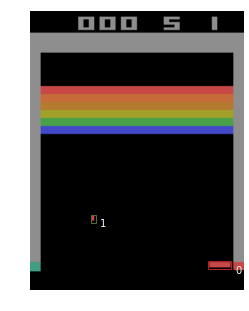


 Frame: 12


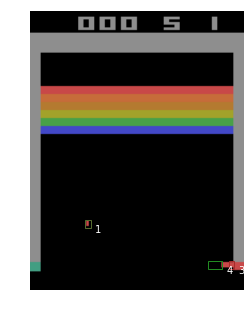


 Frame: 13


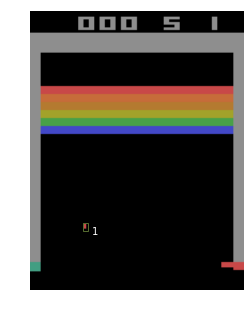


 Frame: 14


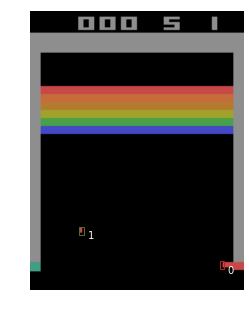


 Frame: 15


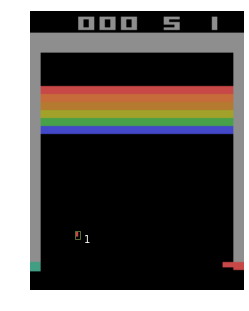


 Frame: 16


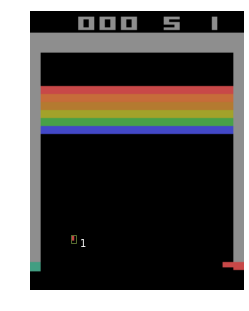


 Frame: 17


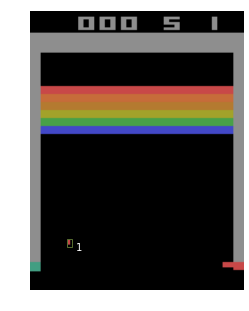


 Frame: 18


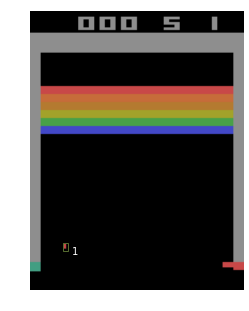


 Frame: 19


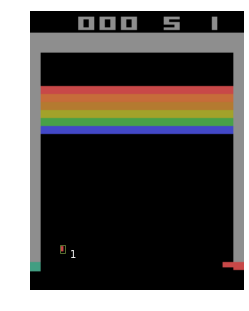


 Frame: 20


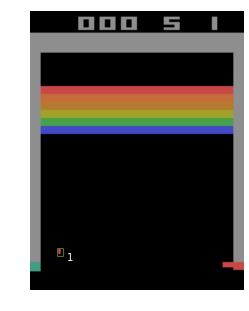

In [17]:
for i in range(mt.cur_frame):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
        
    ax = plt.gca()
    plt.axis('off')
    if i == 0:
        plt.imshow(fp[i].s0)
    else:
        plt.imshow(fp[i-1].s1)
    for data in movers_cur_frame:
        m_id = data[0]
        box = data[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[(m_id+1) % len(box_colors)],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()


 Frame: 0


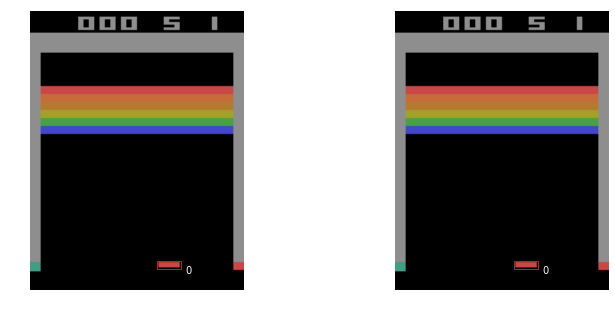


 Frame: 1


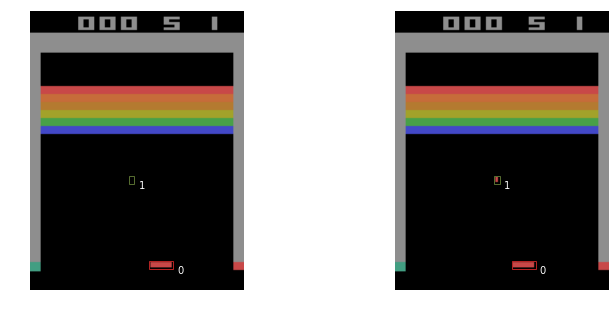


 Frame: 2


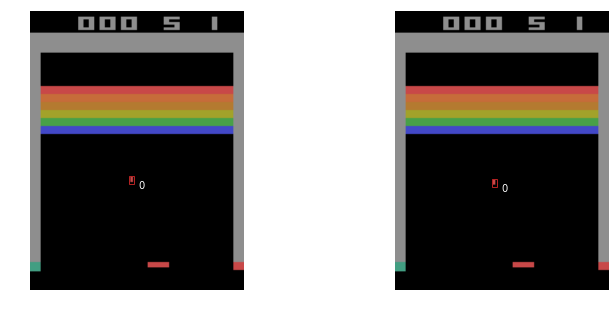


 Frame: 3


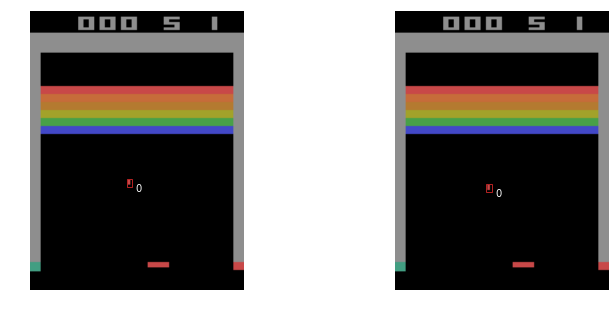


 Frame: 4


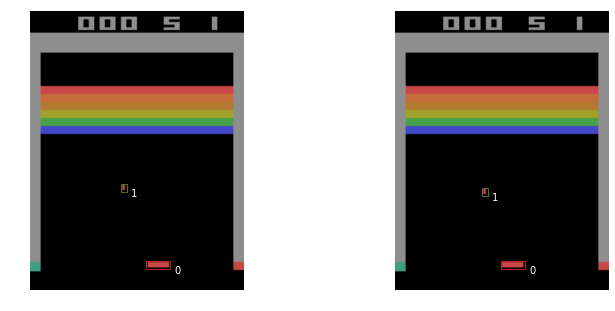


 Frame: 5


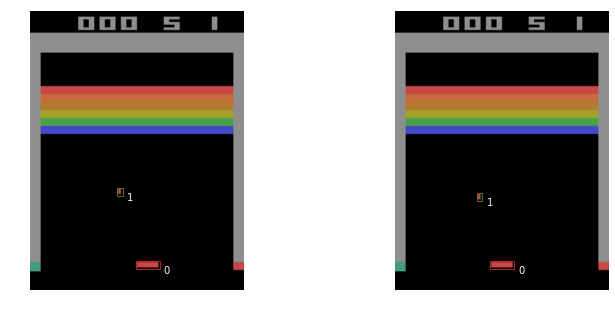


 Frame: 6


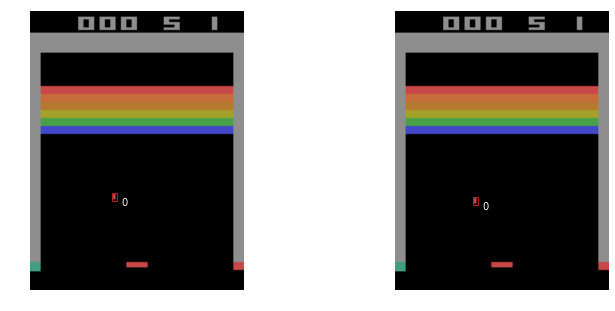


 Frame: 7


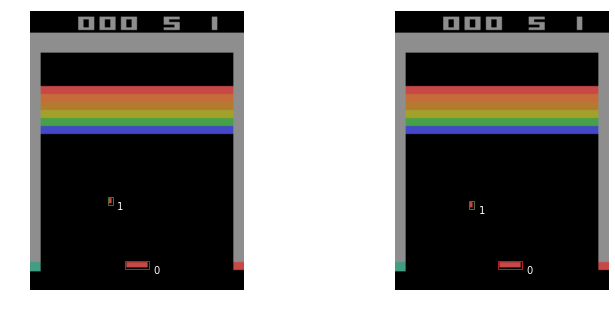


 Frame: 8


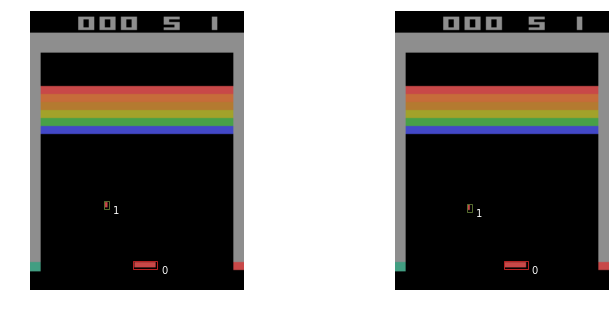


 Frame: 9


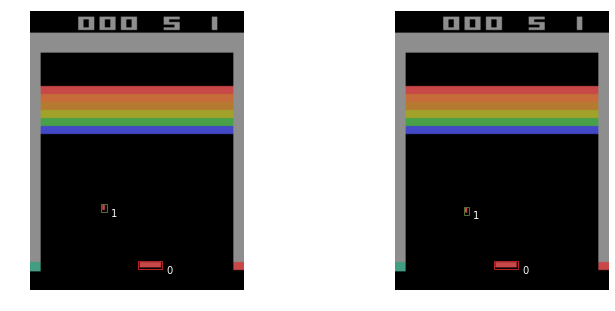


 Frame: 10


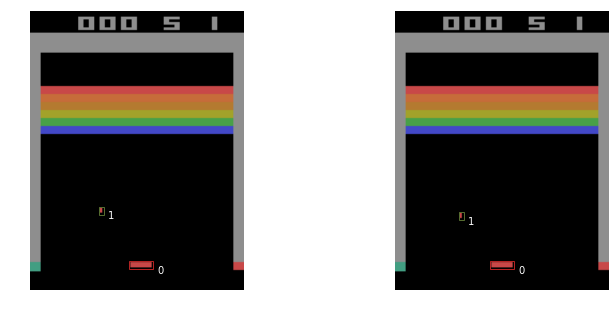


 Frame: 11


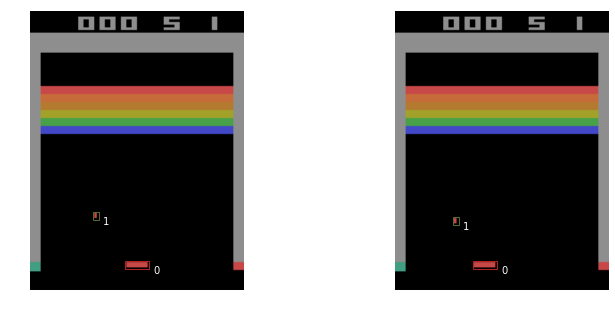


 Frame: 12


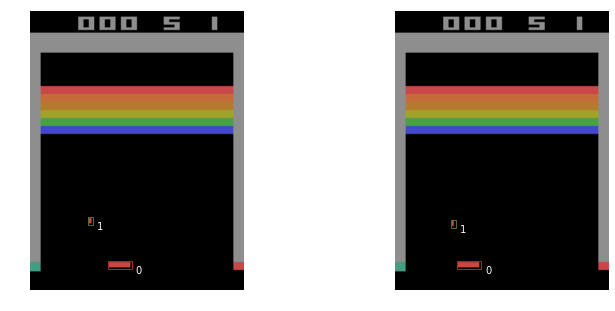


 Frame: 13


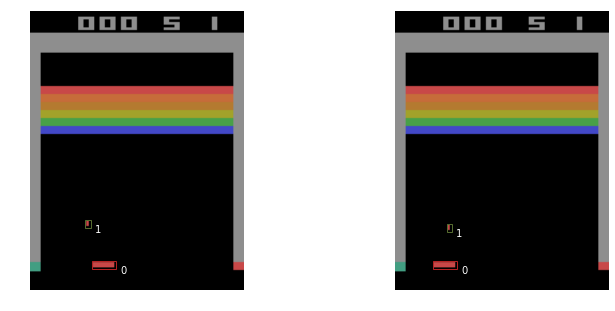


 Frame: 14


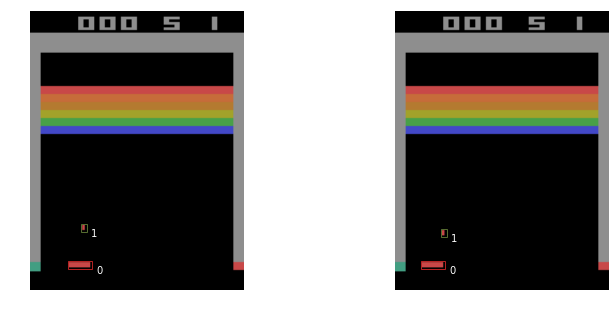


 Frame: 15


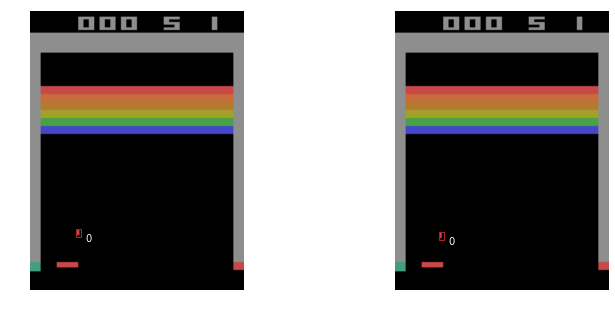


 Frame: 16


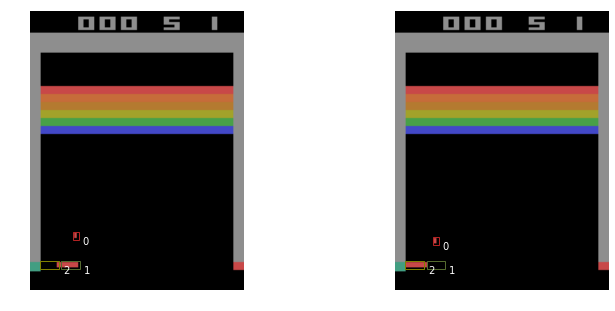


 Frame: 17


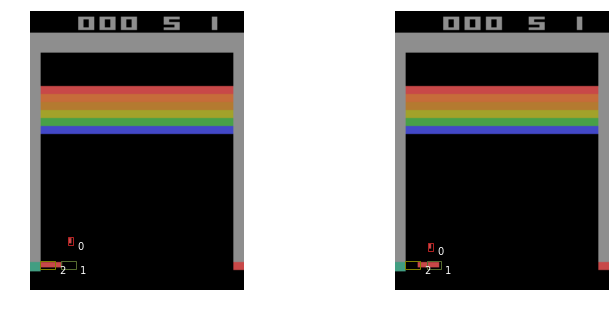


 Frame: 18


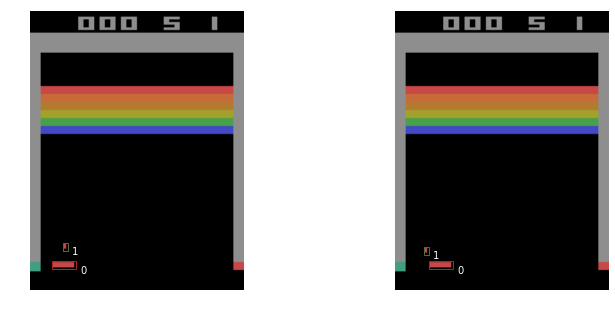


 Frame: 19


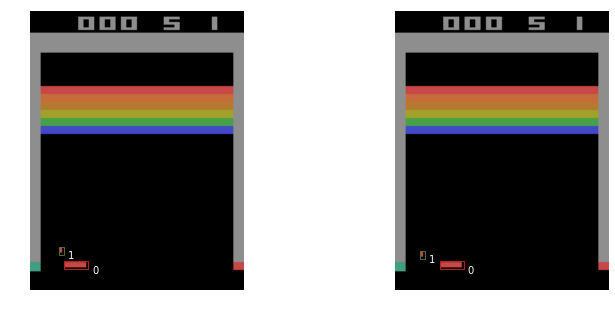


 Frame: 20


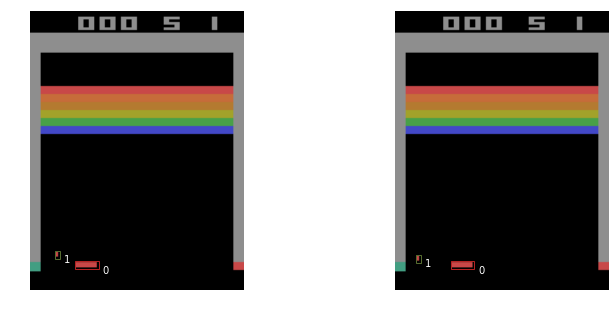


 Frame: 21


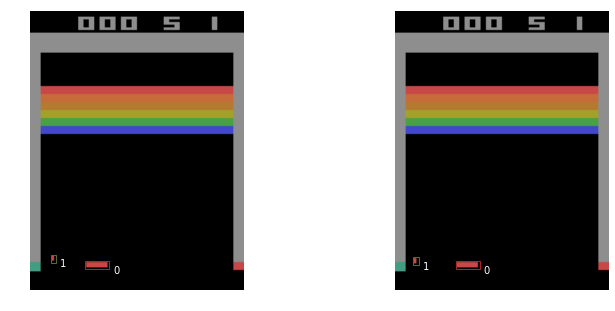


 Frame: 22


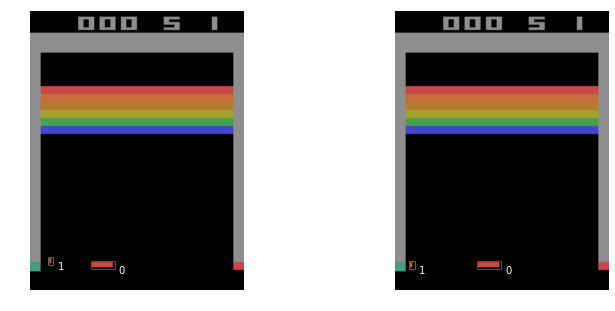


 Frame: 23


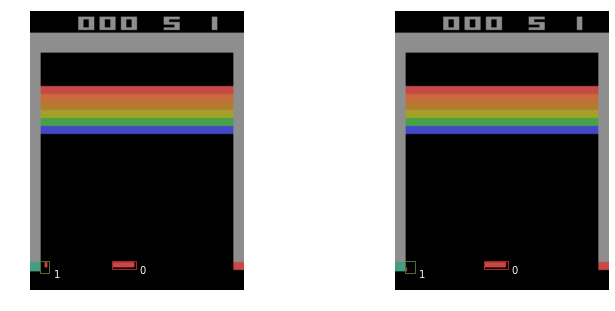


 Frame: 24


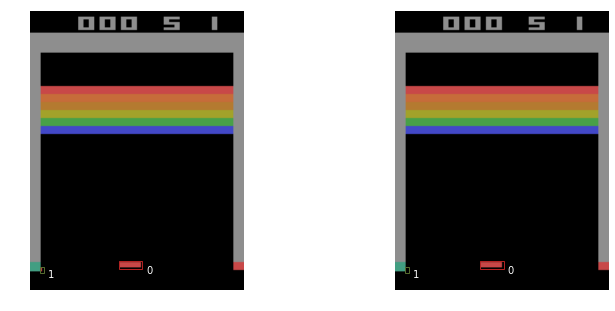


 Frame: 25


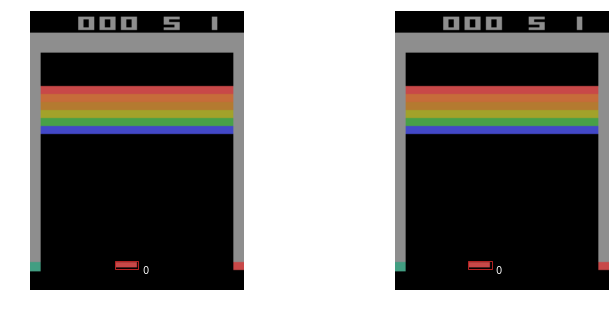


 Frame: 26


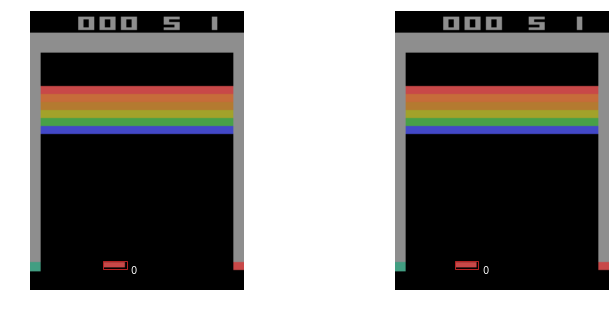


 Frame: 27


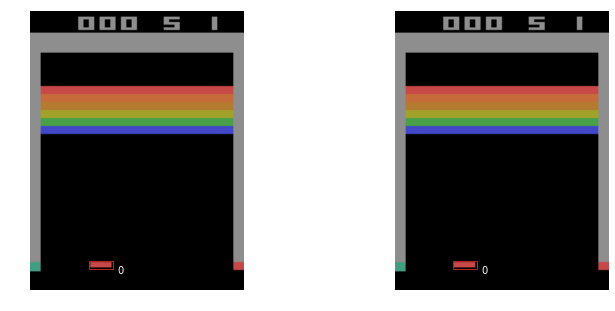


 Frame: 28


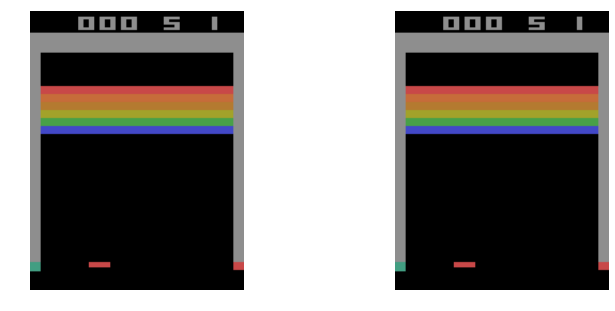


 Frame: 29


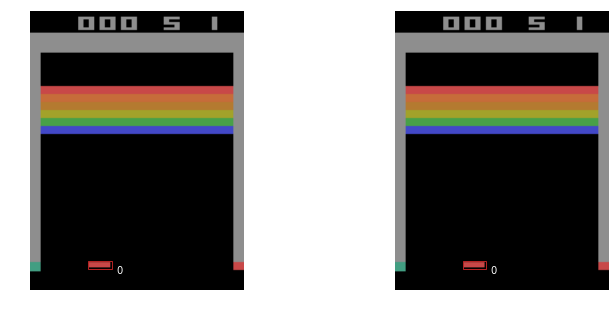


 Frame: 30


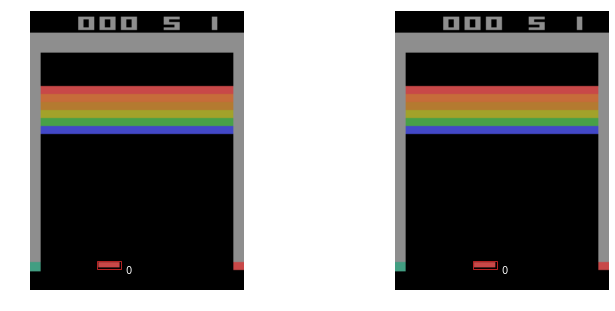


 Frame: 31


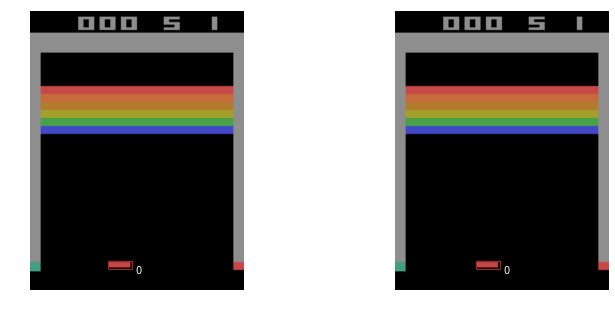


 Frame: 32


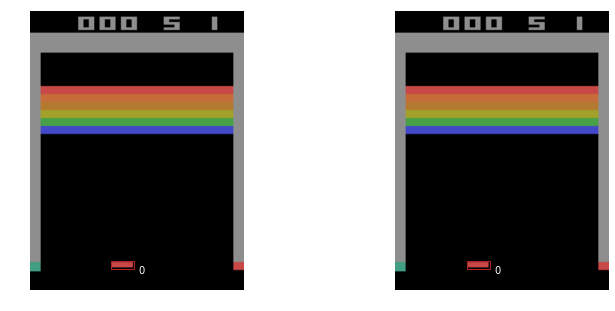


 Frame: 33


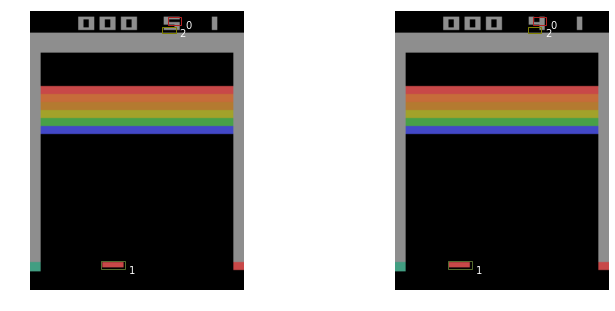


 Frame: 34


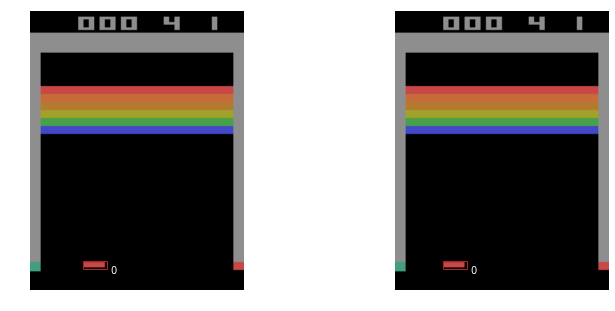

In [50]:
for i in range(mt.cur_frame-1):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
    ax = fig.add_subplot(121)
    plt.axis('off')
    plt.imshow(fp[i].s0)
    finder = fp[i].finder
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[0]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    ax = fig.add_subplot(122)
    plt.axis('off')
    plt.imshow(fp[i].s1)
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()

In [ ]:
print mt.movers[1].trajectory
print mt.movers[2].trajectory

In [ ]:
print fp[2].mover_boxes[1][1]
print fp[3].mover_boxes[1][0]

print (fp[2].mover_boxes[1][1].ll).sq_dist(fp[3].mover_boxes[1][0].ll)
print (fp[2].mover_boxes[1][1].ur).sq_dist(fp[3].mover_boxes[1][0].ur)

In [ ]:
finder=fp[3].finder
#plt.imshow(finder.mover_boxes[1][1].img)
(5 + finder.cnts_joined[2].height) % finder.cnts_joined[2].height
finder.cnts_joined[2].height

In [ ]:
plt.imshow(fp[3].s0 - fp[2].s1)

In [ ]:
s0s = [f.s0 for f in fp]
s1s = [f.s1 for f in fp]

In [ ]:
ii = 2

f0 = cv2.cvtColor(fp[ii].s0, cv2.COLOR_BGR2GRAY).astype('float32')
f1 = cv2.cvtColor(fp[ii].s1, cv2.COLOR_BGR2GRAY).astype('float32')
s0 = fp[ii].s0
s1 = fp[ii].s1

boxes = fp[ii].boxes

plt.imshow(f1-f0)

In [ ]:
def join_cnts(cnts, inds):
    (x, y, w, h) = cv2.boundingRect(cnts[inds[0]])
    ll = Point(x,y)
    ur = Point(x+w,y+h)
    for ind in inds[1:]:
        (x, y, w, h) = cv2.boundingRect(cnts[ind]) 
        if x < ll.x:
            ll.x = x
        if x > ur.x:
            ur.x = x
        if y < ll.y:
            ll.y = y
        if y > ur.y:
            ur.y = y
    return Box(ll,ur)

In [ ]:
frame_diff = fp[ii].s1 - fp[ii].s0
fd_grey = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(fd_grey,1,255,cv2.THRESH_BINARY)[1]
thresh_dilated = cv2.dilate(thresh,None,iterations=1)
(cnts, _) = cv2.findContours(thresh_dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

from itertools import combinations
all_joins = [c \
 for l in range(1,len(cnts)+1) \
 for c in combinations(range(len(cnts)),l)\
]

cnts_joined = [join_cnts(cnts,inds) for inds in all_joins] 

'''
for i, c in enumerate(cnts_joined):
    (x, y, w, h) = (c.ll.x, c.ll.y, c.width, c.height)
    plt.imshow(thresh_dilated,cmap='gray')
    ax = plt.gca()
    plt.axis([0, 159, 209, 0])
    ax.add_patch(patches.Rectangle((x,y),w,h,color='g',fill=False))
    plt.show()
'''

In [ ]:
def generate_translate(f0, f1, shifts, debug=False):
    out = np.zeros(f0.shape)
    #out = f1.copy()
    n_changed = 0
    for i in range(shifts.shape[0]):
        for j in range(shifts.shape[1]):
            try:
                x_out_float = (i+shifts[i,j,0])# % out.shape[0]
                y_out_float = (j+shifts[i,j,1])# % out.shape[1]
                
                #frac_x = x_out_float - int(x_out_float)
                #frac_y = y_out_float - int(y_out_float)

                x_out = np.round(x_out_float).astype(int) % out.shape[0]
                y_out = np.round(y_out_float).astype(int) % out.shape[1]
                
                out[x_out,y_out,:] = f0[i,j,:]
                #out[x_out,y_out,:] = (1-frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out+1,y_out,:] += (frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out,y_out+1,:] += (1-frac_x)*(frac_y)*f0[i,j,:]
                #out[x_out+1,y_out+1,:] += (frac_x)*(frac_y)*f0[i,j,:]
                n_changed += 1
            except IndexError:
                pass
    if debug:
        return out, n_changed
    else:
        return out

In [ ]:
all_joins

In [ ]:
cnt_scores = {i: [] for i in range(len(cnts))}
cnt_score_params = {i: [] for i in range(len(cnts))}
for box_id, box in enumerate(cnts_joined):
    print box_id, '\n'
    box0 = Box(box.ll, box.ur)
    box1 = Box(box.ll, box.ur)
    # grayscale
    box0.add_image(f0)
    box1.add_image(f1)

    box0_1channel = np.expand_dims(box0.img,2)
    box1_1channel = np.expand_dims(box1.img,2)
    
    shifts = np.zeros((f0.shape[0],f0.shape[1],2))
    pc = cv2.phaseCorrelate(box0.img,box1.img)
    four_shifts = [[np.floor(pc[1]),np.floor(pc[0])],\
                   [np.ceil(pc[1]),np.floor(pc[0])],\
                   [np.floor(pc[1]),np.ceil(pc[0])],\
                   [np.ceil(pc[1]),np.ceil(pc[0])]
                  ]
    best_ratio = 1
    
    best_shift = four_shifts[0]
    for s in four_shifts:
        shifts[:,:,0] = s[0]
        shifts[:,:,1] = s[1]

        synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
        synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

        ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
        ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

        ratio_s = max(ratio0,ratio1)
        if ratio_s < best_ratio:
            best_shift = s
            best_ratio = ratio_s
    
    s = best_shift
    for ind in all_joins[box_id]:
        cnt_scores[ind].append(best_ratio)
        cnt_score_params[ind].append([all_joins[box_id], s])
    
    shifts[:,:,0] = s[0]
    shifts[:,:,1] = s[1]

    synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
    synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

    ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
    ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

    print ratio0
    print ''
    print ratio1
    print ''

    print s, '\n'

    plt.figure()
    plt.subplot(141)
    plt.axis('off')
    plt.imshow(box0.img,cmap='gray')
    plt.subplot(142)
    plt.axis('off')
    plt.imshow(box1.img,cmap='gray')
    plt.subplot(143)
    plt.axis('off')
    plt.imshow(synth_box0.squeeze(),cmap='gray')
    plt.subplot(144)
    plt.axis('off')
    plt.imshow(synth_box1.squeeze(),cmap='gray')

    plt.figure()
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(box0.img - box1.img)
    plt.colorbar()
    plt.subplot(122)
    plt.axis('off')
    plt.imshow(box0.img - synth_box0.squeeze())
    plt.colorbar()

    plt.show()

In [ ]:
print cnt_scores
print cnt_score_params

print cnt_scores_remaining

In [ ]:
pdb.set_trace()
cnt_best_params = {}
cnt_scores_remaining = cnt_scores.copy()
cnt_score_params_remaining = cnt_score_params.copy()

while len(cnt_best_params) < len(cnts):
    best_scores_cnts = {k: min(v) \
                        for k, v in cnt_scores_remaining.iteritems()}
    winning_index = np.argmin(best_scores_cnts.values())
    winner = best_scores_cnts.keys()[winning_index]
    winner_best_index = np.argmin(cnt_scores_remaining[winner])
    cnt_best_params[winner] = cnt_score_params[winner][winner_best_index]
    print cnt_scores_remaining, '\n'
    print cnt_score_params_remaining, '\n\n'
    forbidden_inds = set(cnt_best_params[winner][0])
    for k in cnt_scores_remaining:
        scores_k = cnt_scores_remaining[k]
        for j, sc in enumerate(scores_k):
            join_k_j = cnt_score_params_remaining[k][j][0]
            if len(forbidden_inds & set(join_k_j)) > 0:
                del cnt_scores_remaining[k][j]
                del cnt_score_params_remaining[k][j]
    cnt_scores_remaining.pop(winner)
cnt_best_params 

In [ ]:
cnt_best_params = {}
for cnt_id in cnt_scores:
    best_index = np.argmin(cnt_scores[cnt_id])
    cnt_best_params[cnt_id] = cnt_score_params[cnt_id][best_index]
cnt_best_params

In [ ]:
mover_joins = set()
mover_shifts = {}
for c in cnt_best_params.values():
    mover_joins.add(c[0])
    mover_shifts[c[0]] = Point(int(c[1][1]),int(c[1][0]))
mover_boxes = {inds: join_cnts(cnts,inds) for inds in mover_joins}

In [ ]:
for ind in mover_boxes:
    box = mover_boxes[ind]
    shift = mover_shifts[ind]
    # delete line below later
    shift = Point(shift.x, shift.y)
    print shift
    n_shift = -shift
    box0 = Box(box.ll-shift.thresh(-1), box.ur-shift.thresh(1))
    box1 = Box(box.ll-n_shift.thresh(-1), box.ur-n_shift.thresh(1))
    print box0.center
    print box1.center
    print box1.center - box0.center
    box0.add_image(s0)
    box1.add_image(s1)
    plt.subplot(121)
    plt.imshow(box0.img)
    plt.subplot(122)
    plt.imshow(box1.img)
    plt.show()

In [ ]:
def score(f0, f1, shifts):
    err = f1 - generate_translate(f0, f1, shifts)
    return np.sqrt(sum(err.flatten()**2))

def start(f0, f1):
    diff = f1 - f0
    nz = diff.nonzero()
    rand_nz = np.random.randint(nz[0].shape[0])
    point = (nz[0][rand_nz], nz[1][rand_nz])

    scores = []
    inds = []
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for i in range(-3,4):
        for j in range(-3,4):
            s[point[0], point[1], 0] = i
            s[point[0], point[1], 0] = j
            inds.append((i,j))
            scores.append(score(f0, f1, s))
    shift = inds[np.argmin(scores)]
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    s[point[0], point[1], 0] = shift[0]
    s[point[0], point[1], 1] = shift[1]
    print score(f0, f1, s)
    return shift

def expand(f0, f1, shift):
    diff = f1 - f0
    nz = diff.nonzero()
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for ind in range(nz[0].shape[0]-1):
        i = nz[0][ind]
        j = nz[1][ind]
        s[i,j,0] = shift[0]
        s[i,j,1] = shift[1]
    s[:,:,0] = shift[0]
    s[:,:,1] = shift[1]
    print score(f0, f1, s)
    return s

In [ ]:

mhi = np.zeros(frame_thresh[0].shape,dtype=np.float32)

f_gray = cv2.cvtColor(fp[0].s0, cv2.COLOR_BGR2GRAY)
cv2.updateMotionHistory(f_gray,mhi,1,10)

for i, f in enumerate(fp):
    f_gray = cv2.cvtColor(f.s1, cv2.COLOR_BGR2GRAY)
    cv2.updateMotionHistory(f_gray,mhi,i+2,10)

In [ ]:
for i in range(1,10):
    mhi2 = mhi.copy()
    mhi2[mhi2 != i] = 0
    plt.imshow(mhi2,cmap='gray')
    plt.show()

In [ ]:
mg_mask, mg_orient = cv2.calcMotionGradient(mhi,1,3)

for i in range(len(frame_thresh)+1):
    seg_mask, seg_bounds = \
    cv2.segmentMotion(mhi, i+1, 2)
    
    plt.figure(figsize=(12,5))
    ax = plt.subplot(131)
    plt.imshow(seg_mask,cmap='gray')
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(132)
    plt.imshow(s0s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(133)
    plt.imshow(s1s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    plt.show()

In [ ]:
i=3
s0=s0s[i]
s1=s0s[i+1]

s0_gray = cv2.cvtColor(s0, cv2.COLOR_BGR2GRAY)
s1_gray = cv2.cvtColor(s1, cv2.COLOR_BGR2GRAY)

plt.imshow(s1-s0)

In [ ]:
shift

In [ ]:
shift = start(s0,s1)
print score(s0, s1, np.zeros((s0.shape[0],s0.shape[1],2),dtype=int))
s = expand(s0, s1, shift)
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.imshow(generate_translate(s0, s1, s))
plt.subplot(132)
plt.imshow(s0)
plt.subplot(133)
plt.imshow(s1)

In [ ]:
s = 0*np.ones((s0.shape[0],s0.shape[1],2),dtype=int)
s[:,:,0]=0

In [ ]:
plt.imshow(generate_translate(s0, s1, s))

In [ ]:
plt.imshow(s0)
plt.show()
plt.imshow(s1)
plt.show()